<a href="https://colab.research.google.com/github/jamesjulius-02/K-Nearest-Neighbors-KNN-/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Metric: euclidean, Weight: uniform
Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Metric: euclidean, Weight: distance
Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00 

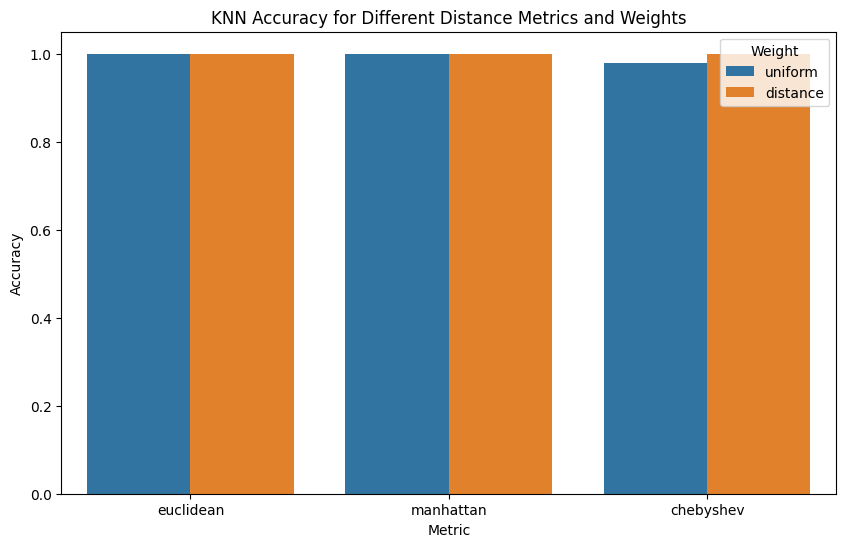

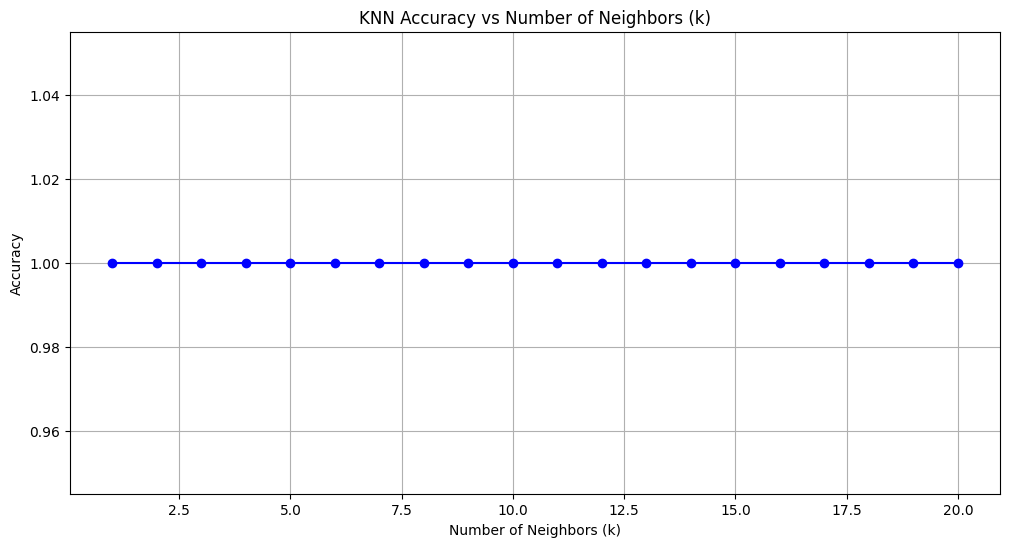

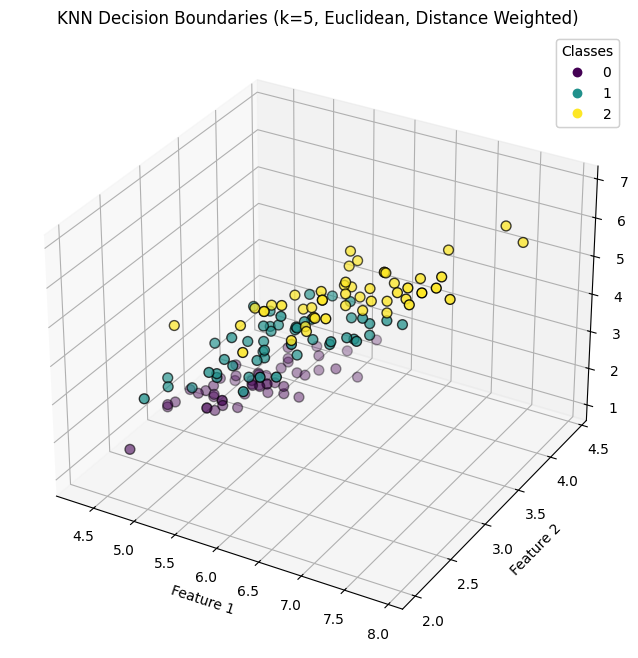

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D

# Load dataset (Iris dataset as an example)
iris = load_iris()
X = iris.data  # Use all features this time
y = iris.target

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Experiment with different distance metrics and weights
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
weights_options = ['uniform', 'distance']

results = []
for metric in distance_metrics:
    for weight in weights_options:
        # Train the model with different metrics and weights
        model = KNeighborsClassifier(n_neighbors=5, metric=metric, weights=weight)
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((metric, weight, accuracy))

        print(f"\nMetric: {metric}, Weight: {weight}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Visualize accuracy of different configurations
results_df = pd.DataFrame(results, columns=['Metric', 'Weight', 'Accuracy'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Accuracy', hue='Weight', data=results_df)
plt.title('KNN Accuracy for Different Distance Metrics and Weights')
plt.show()

# 2. Testing a range of k values with Euclidean distance and weighted by distance
k_values = list(range(1, 21))
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='distance')
    knn_model.fit(X_train, y_train)
    y_pred_k = knn_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

# Plotting accuracy as a function of k
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.title('KNN Accuracy vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# 3. Visualizing 3D decision boundaries (using only 3 features for illustration)
def plot_knn_3d(X, y, model, title=''):
    # Create a 3D plot to show decision boundaries and data points
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=50, edgecolor='k')
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.show()

# Plot decision boundary for k=5 in 3D space
best_knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='distance')
best_knn_model.fit(X_train, y_train)
plot_knn_3d(X, y, best_knn_model, title='KNN Decision Boundaries (k=5, Euclidean, Distance Weighted)')

# ROC Curve (for binary classification only, if iris dataset was binary)
# Uncomment below for binary classification, adjusting for pos_label as needed
# y_proba = best_knn_model.predict_proba(X_test)[:, 1]  # Probability of positive class
# fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)
# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()
